### Name : Akshaya 
### Class: 4 MCA 
### Reg No: 2147256

In [ ]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BankChurners.csv")

In [ ]:
# Displaying initial values
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Identifying the number of rows and columns 
data.shape

(10127, 21)

In [ ]:
# There are total of 10127 records as observed with number of unique values in CLIENTNUM. 
# We can notice that education level of people are varied as well along with income  category.
# There are 45 unique values in customer age implying that this information spans across different generations
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [ ]:
# unique Card Category values 
data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
# unique education level values 
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
# unique income category values 
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
# attrition flag unique values 
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
# marital status unique values 
data['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
# identifying missing values
data.isnull()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# No null values in the dataset
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data[['Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']] = scaler.fit_transform(data[['Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']])

In [ ]:
# After min max normalisation, above mentioned columns' data is fitted into the range 0 to 1 
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000


In [ ]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
data['Card_Category']=le.fit_transform(data['Card_Category'])
data['Attrition_Flag']=le.fit_transform(data['Attrition_Flag'])

In [ ]:
# KNN Model
X=data.drop(['CLIENTNUM','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], axis=1)
y=data.Card_Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
# p=1 means manhattan 
# p=2 means euclidean 
# no p means minkowski

In [ ]:
# for k = 20, euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.9302402105955907

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
cm = confusion_matrix(y_pred,y_test)
print("Confusion Matrix Result: ")
print(cm)

Confusion Matrix Result: 
[[2787   18    2  124]
 [   6    8    0    1]
 [   1    1    0    0]
 [  45   13    1   32]]


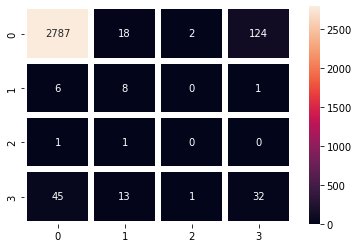

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',linecolor = 'white',linewidths=5)

In [ ]:
# For Minkowski
K=[]
training = []
test=[]
scores={}

for k in range(2,7):
  clf = KNeighborsClassifier(n_neighbors = k)
  clf.fit(X_train, y_train)

  training_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  K.append(k)

  training.append(training_score)
  test.append(test_score)
  scores[k] = [training_score, test_score]

print("Accuracy Scores")
for keys, values in scores.items():
  print(keys, ':', values)


Accuracy Scores
2 : [0.9552765237020316, 0.9279368213228035]
3 : [0.9521726862302483, 0.924646265218822]
4 : [0.9454006772009029, 0.9338598223099703]
5 : [0.9434255079006773, 0.9302402105955907]
6 : [0.9415914221218962, 0.9361632115827575]


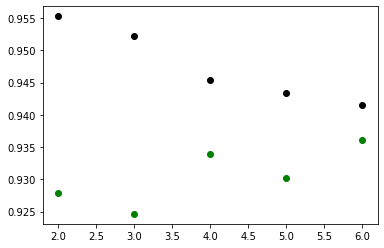

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [ ]:
# For Euclidean 
K=[]
training = []
test=[]
scores={}

for k in range(2,7):
  clf = KNeighborsClassifier(n_neighbors = k, p=2)
  clf.fit(X_train, y_train)

  training_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  K.append(k)

  training.append(training_score)
  test.append(test_score)
  scores[k] = [training_score, test_score]

print("Accuracy Scores")
for keys, values in scores.items():
  print(keys, ':', values)


Accuracy Scores
2 : [0.9552765237020316, 0.9279368213228035]
3 : [0.9521726862302483, 0.924646265218822]
4 : [0.9454006772009029, 0.9338598223099703]
5 : [0.9434255079006773, 0.9302402105955907]
6 : [0.9415914221218962, 0.9361632115827575]


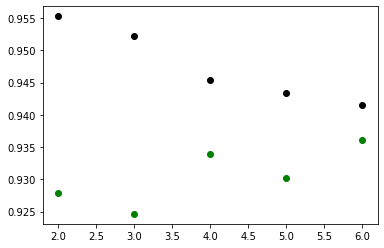

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [ ]:
# For Manhattan
K=[]
training = []
test=[]
scores={}

for k in range(2,7):
  clf = KNeighborsClassifier(n_neighbors = k, p=1)
  clf.fit(X_train, y_train)

  training_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  K.append(k)

  training.append(training_score)
  test.append(test_score)
  scores[k] = [training_score, test_score]

print("Accuracy Scores")
for keys, values in scores.items():
  print(keys, ':', values)

Accuracy Scores
2 : [0.9556997742663657, 0.9295820993747943]
3 : [0.95372460496614, 0.9243172096084238]
4 : [0.9454006772009029, 0.9338598223099703]
5 : [0.9430022573363431, 0.9312273774267851]
6 : [0.9418735891647856, 0.9341888779203685]


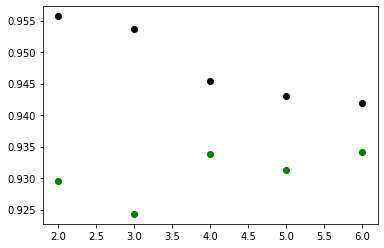

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2931
           1       0.20      0.53      0.29        15
           2       0.00      0.00      0.00         2
           3       0.20      0.35      0.26        91

    accuracy                           0.93      3039
   macro avg       0.35      0.46      0.38      3039
weighted avg       0.95      0.93      0.94      3039

